# Engine Fricton Prediction

### This model will estimate engine friction torque (N-m) by using input engine operating parameters such as oil temperature, engine speed, coolant temperature, main bearing temperature etc.

In [1]:
#import required libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Function to find relation between all data parameters 
def scatter_plot (data):
    scatter_matrix_plot = scatter_matrix(dataset, figsize=(20, 20))
    for ax in scatter_matrix_plot.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize = 7, rotation = 45)
        ax.set_ylabel(ax.get_ylabel(), fontsize = 7, rotation = 90)
    return scatter_matrix_plot

In [3]:
#import test data
dataset = pd.read_csv('Dataset.csv')

In [5]:
#Inspect first five rows of data
dataset.head()

,Engine_Speed,tCell_Ambient,tCoolant_Out,tOil_Gallery_PRT,pgCrankcase,pgOil_Gallery,qCoolant,TC1_MB1_Rr_NonThrust,TC2_MB2_Fr_Thrust,TC3_MB2_Rr_NonThrust,qOil,Dyno_Torque
0,600.168549,19.815639,89.210081,90.013084,0.184657,202.155172,54.764163,88.856349,90.226558,89.725233,8.622170,-3.305795
1,999.802091,19.880816,89.186120,89.982179,0.204235,206.626762,54.811896,89.539976,91.255460,89.930657,8.657818,-4.067072
2,1249.690868,19.822655,89.509021,89.980994,0.238657,208.994112,60.876319,91.149404,92.802257,91.016799,9.102568,-4.628014
3,1499.255964,19.838063,89.297984,89.997491,0.230333,211.081786,55.257019,90.900610,93.173178,91.036285,9.265458,-5.273034
4,1999.619001,20.120371,89.370456,90.023089,0.217678,214.996024,55.238299,91.647150,94.748007,92.167746,10.162920,-6.437700


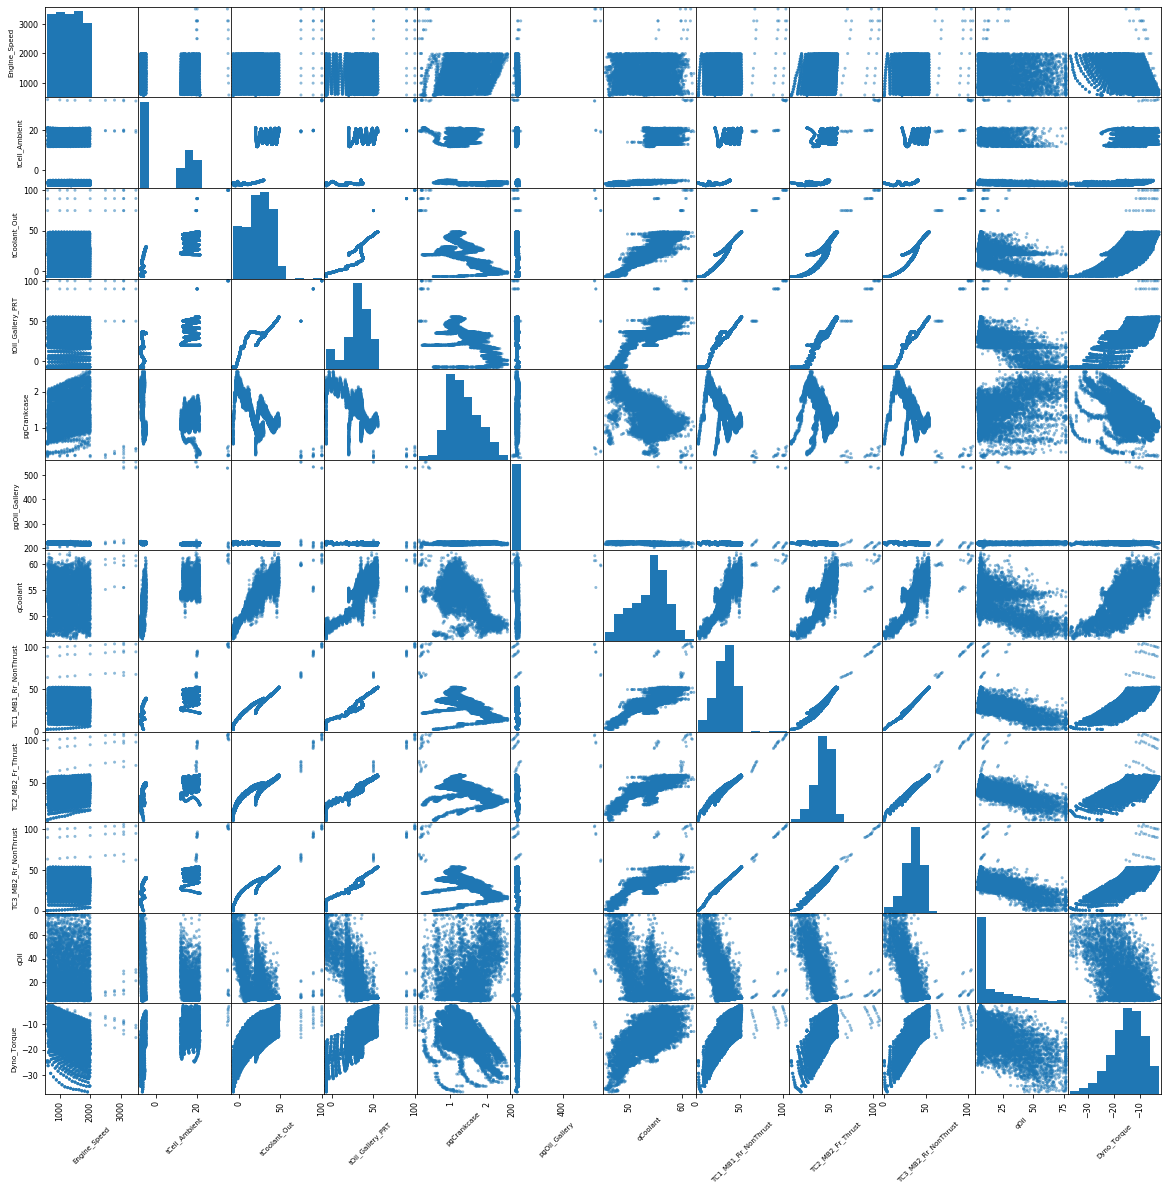

In [8]:
#Find relation between all data parameters
scatter_matrix_plot = scatter_matrix(dataset, figsize=(20, 20))
for ax in scatter_matrix_plot.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 7, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 7, rotation = 90)
plt.show()


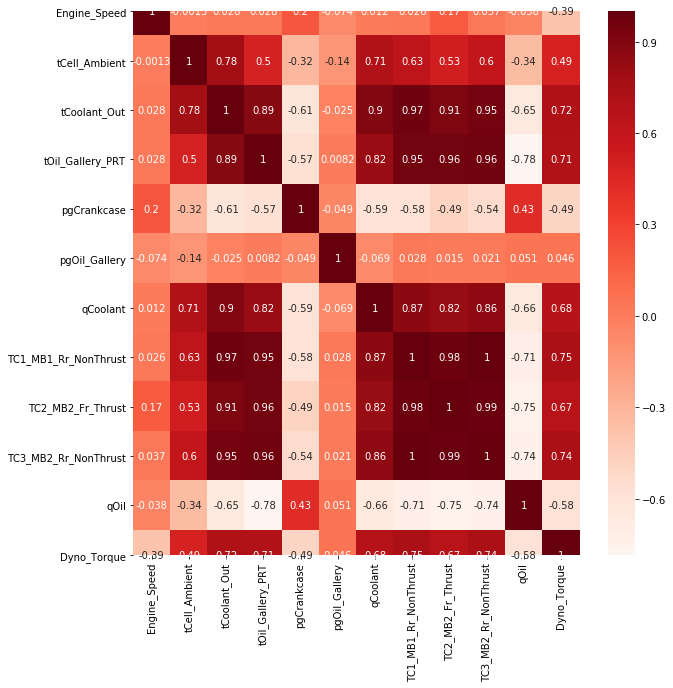

In [9]:
#Using Pearson Correlation find relation between various parameters
plt.figure(figsize=(10,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
#Find out co-relation between variables
corr_matrix = dataset.corr()
corr_matrix["Dyno_Torque"].sort_values(ascending=False)

Dyno_Torque             1.000000
TC1_MB1_Rr_NonThrust    0.747782
TC3_MB2_Rr_NonThrust    0.741253
tCoolant_Out            0.718334
tOil_Gallery_PRT        0.713659
qCoolant                0.683978
TC2_MB2_Fr_Thrust       0.671346
tCell_Ambient           0.490276
pgOil_Gallery           0.046467
Engine_Speed           -0.394225
pgCrankcase            -0.494108
qOil                   -0.579707
Name: Dyno_Torque, dtype: float64

In [11]:
#define X(input) and y(output)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
#devide data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [13]:
#fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #This uses normal equation to calcuate theta for minimum cost function
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#predicting the test set results
y_pred = regressor.predict(X_test)

In [16]:
#Checking efficiency of model
print('Variance score for training data: %.2f' % regressor.score(X_train, y_train))
print('Variance score for test test: %.2f' % regressor.score(X_test, y_test))

Variance score for training data: 0.75
Variance score for test test: 0.76


#### Note: 
#### Sklearn LinearRegaression model has inbuild capability of performing scaling. Hence even after scaling, model output will remained same. 
#### Feature reduction may help to improve model accuracy.
#### Other machine learning regression model such as polynomial and Support Vector Regression (SVR) will be used in next part of work.